In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [5]:
folder_names = 'LDEM_0_75E_0_30N_float_60fov_1024_1024_'
directory = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted'

off_nadir_folders = [folder for folder in os.listdir(directory) if folder.startswith(folder_names)]
off_nadir_folders


['LDEM_0_75E_0_30N_float_60fov_1024_1024_20deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_60deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_40deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_50deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_30deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_0deg_off_nadir',
 'LDEM_0_75E_0_30N_float_60fov_1024_1024_10deg_off_nadir']

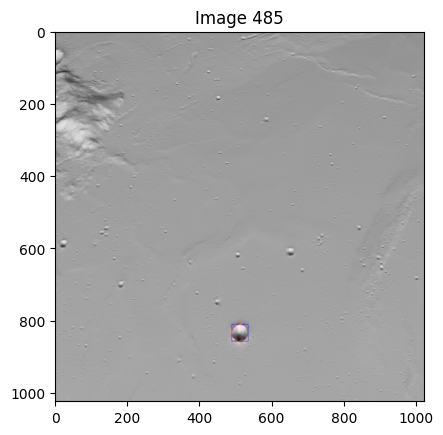

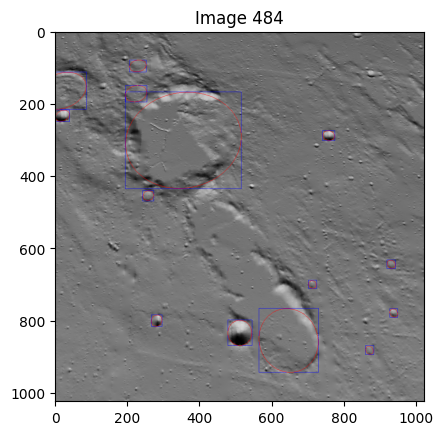

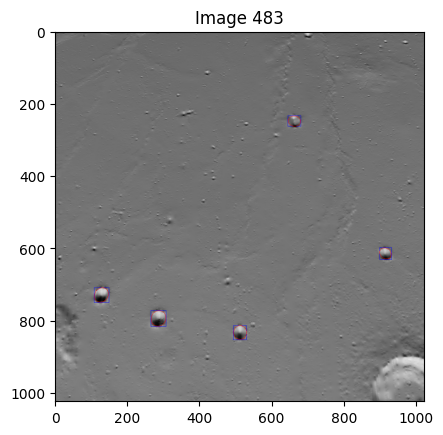

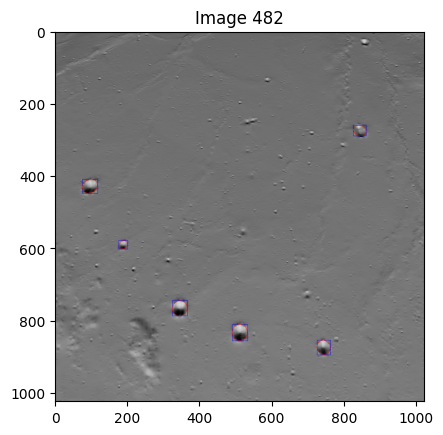

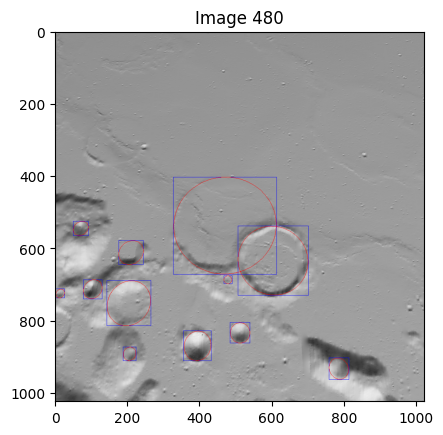

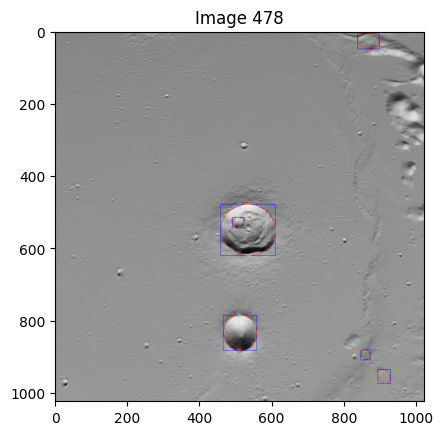

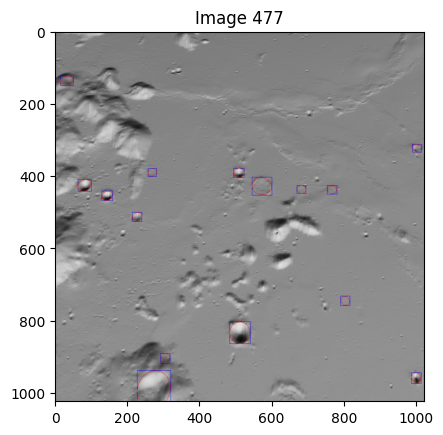

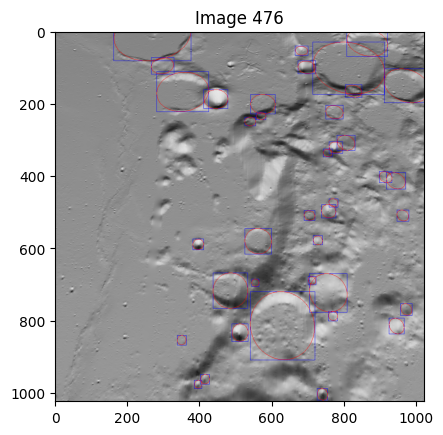

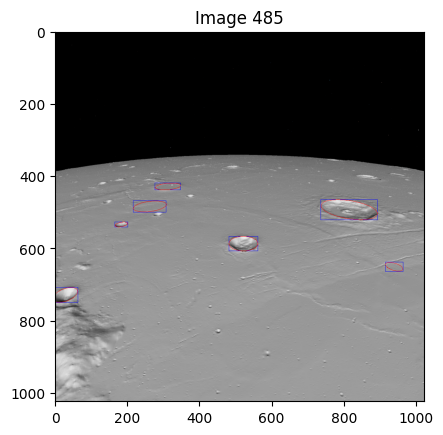

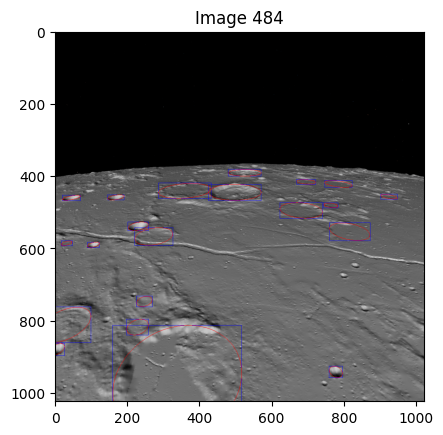

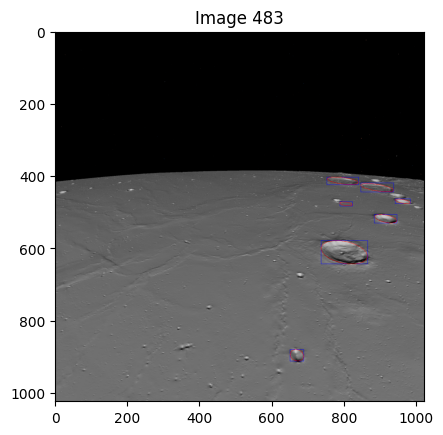

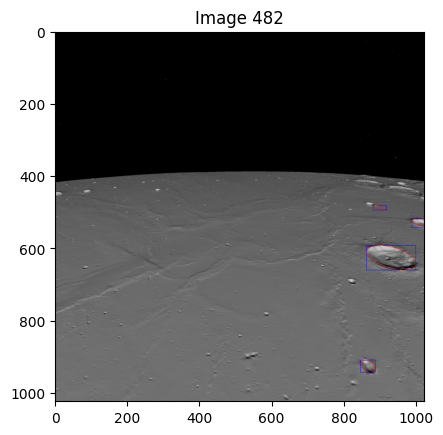

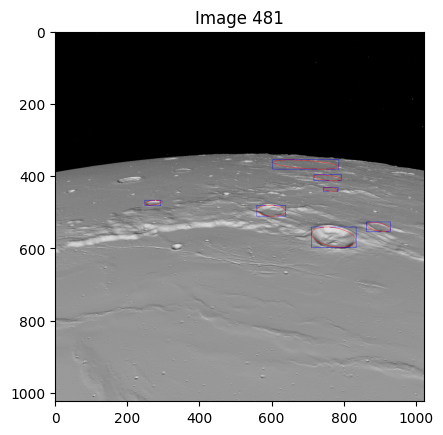

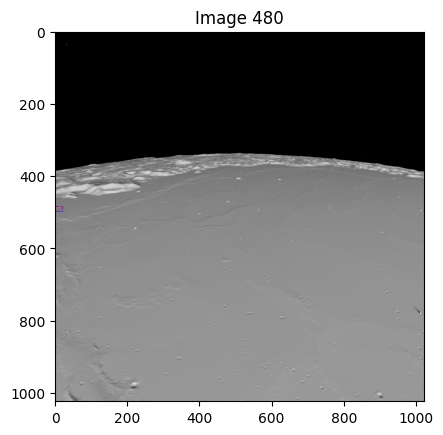

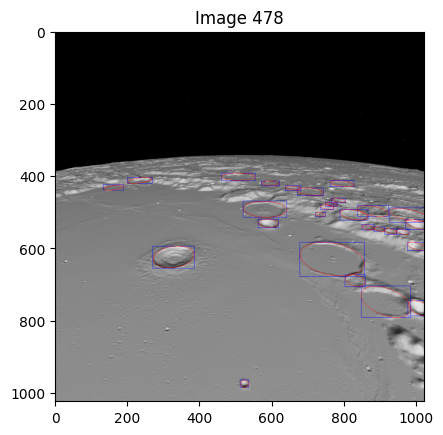

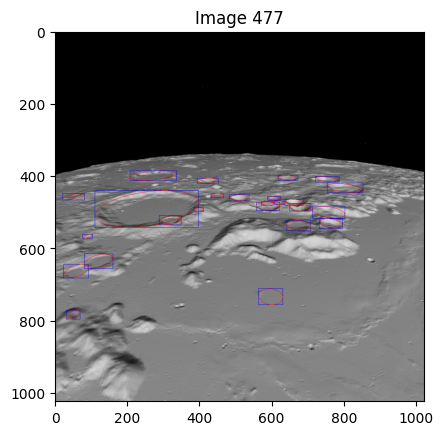

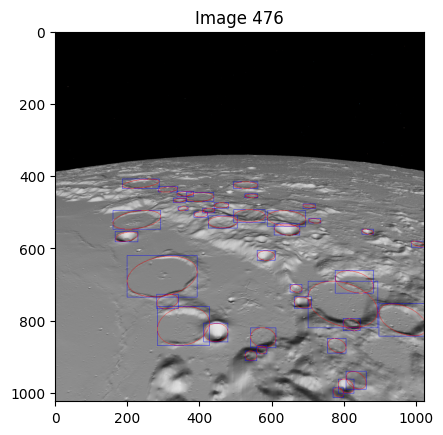

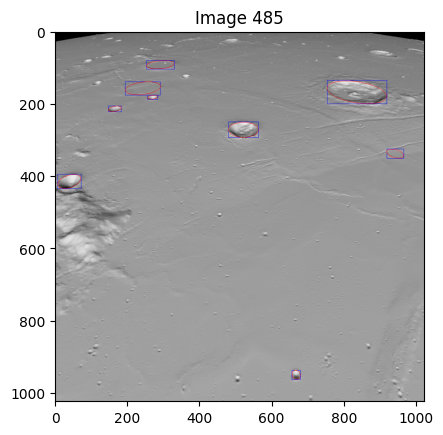

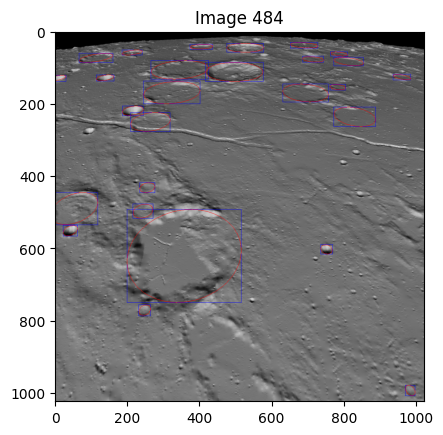

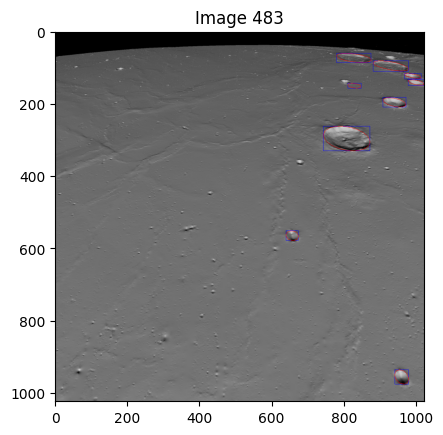

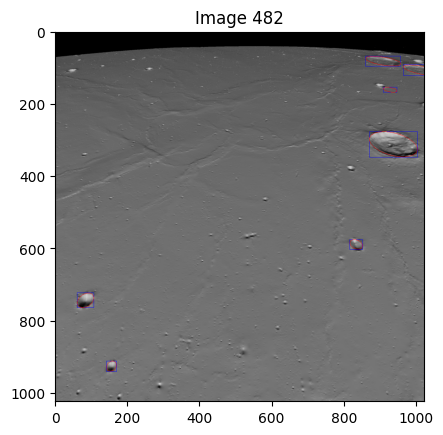

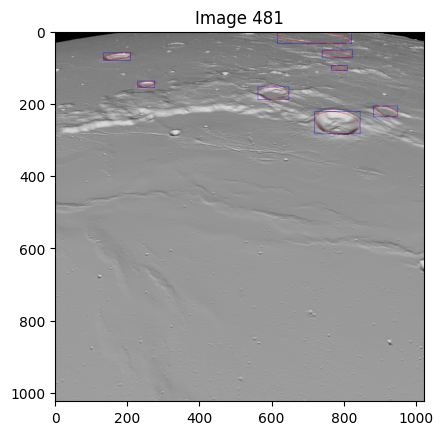

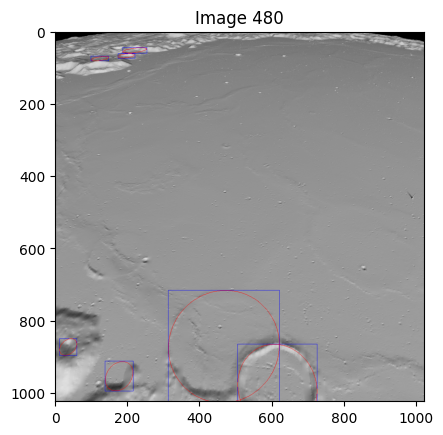

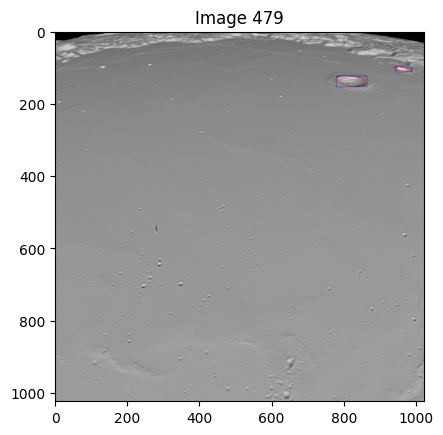

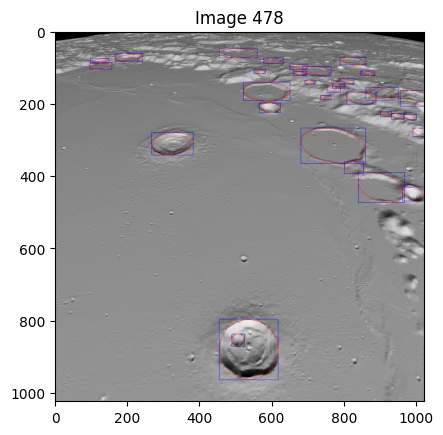

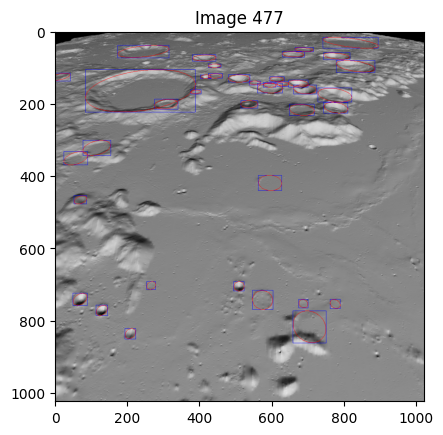

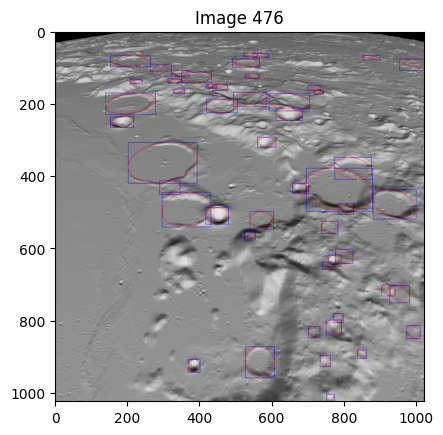

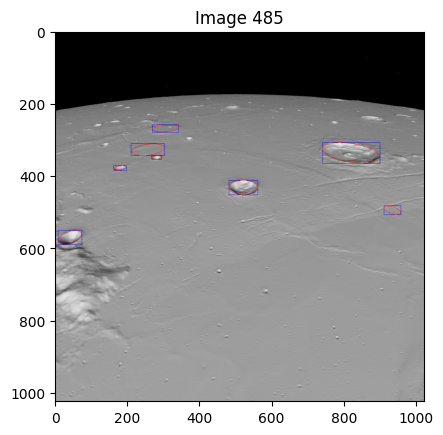

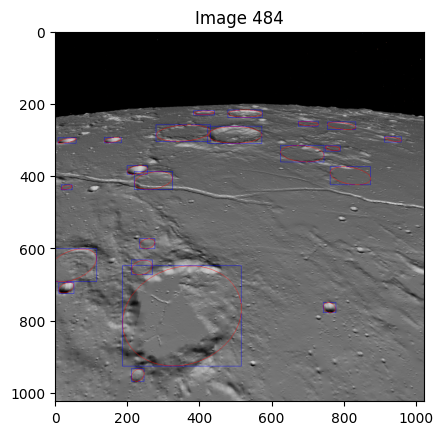

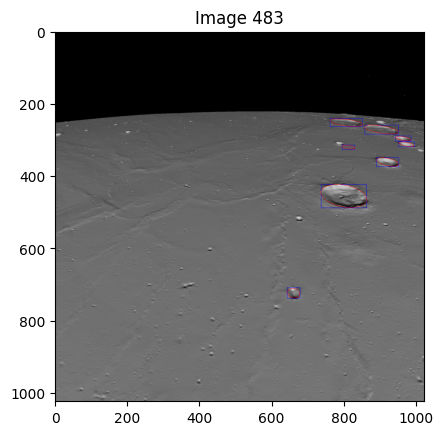

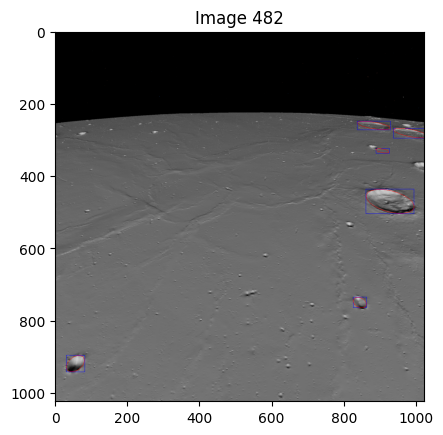

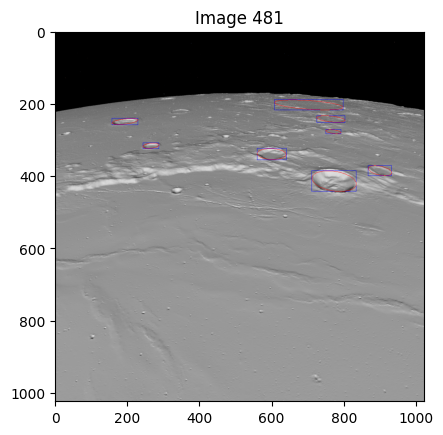

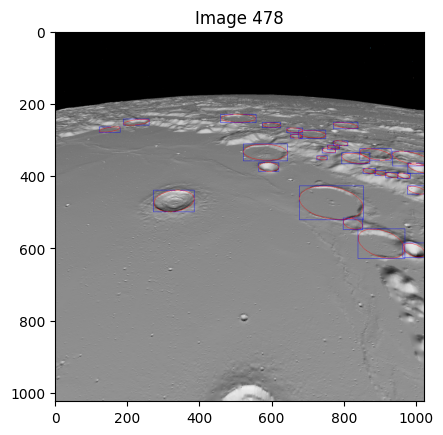

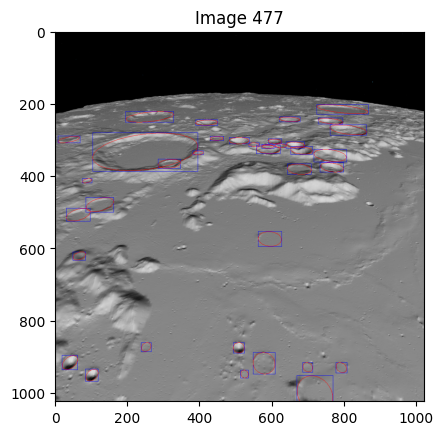

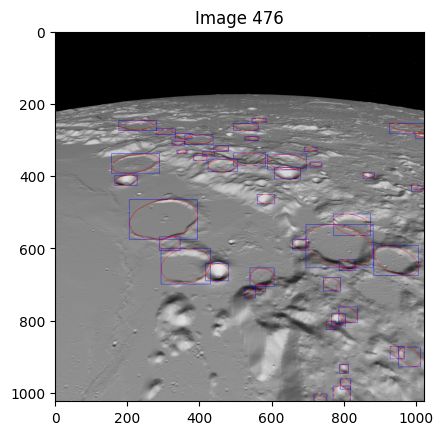

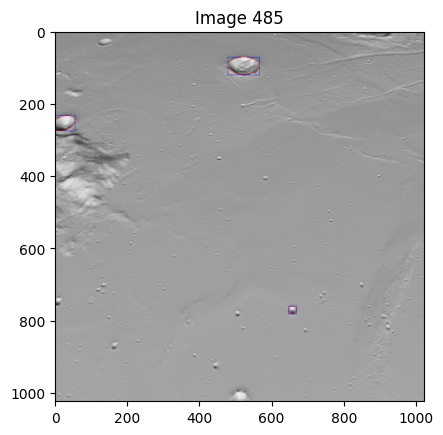

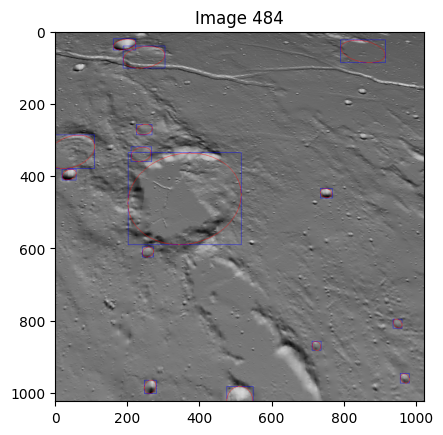

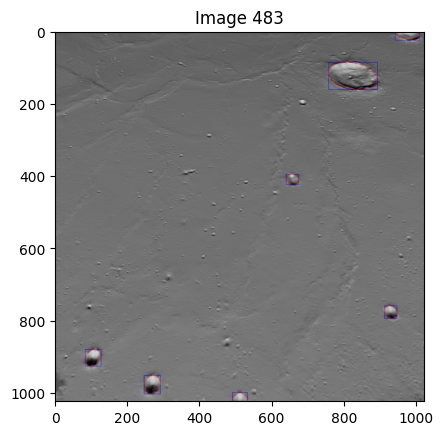

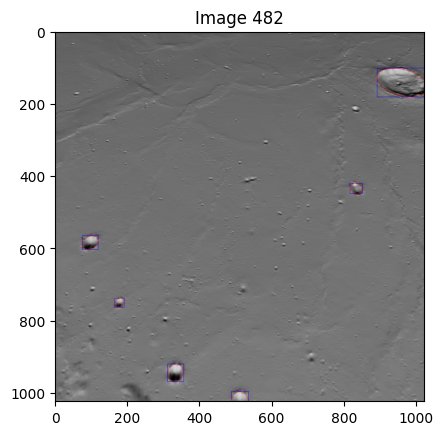

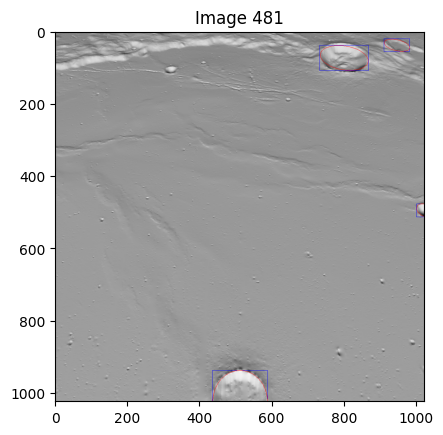

KeyboardInterrupt: 

In [6]:
for off_nadir_folder in off_nadir_folders:
    root_dir = os.path.join(directory, off_nadir_folder)
    image_dir = os.path.join(root_dir, 'ground_truth_images')
    images_boxes_dir = os.path.join(root_dir, 'ground_truth_bounding_boxes')
    images_ellipses_dir = os.path.join(root_dir, 'ground_truth_projected_ellipses')
    
    image_dir_items = [i.split(".")[0] for i in os.listdir(image_dir)]
    images_boxes_dir_items = [i.split(".")[0] for i in os.listdir(images_boxes_dir)]
    images_ellipses_dir_items = [i.split(".")[0] for i in os.listdir(images_ellipses_dir)]
    items = list(set(image_dir_items) & set(images_boxes_dir_items) & set(images_ellipses_dir_items))
    items = sorted(items, key=lambda x: int(x.split('.')[0]), reverse=True)
    image_files = []
    for i in items[:10]:
        image_files.append(f'{i.split(".")[0]}.png')

    images = {}
    for file in image_files:
        image_path = os.path.join(image_dir, file)
        image = cv2.imread(image_path)
        images[file.split('.')[0]] = image
        
    boxes_files = []
    for i in list(images.keys()):
        boxes_files.append(f'{i}.txt')
        
    boxes = {}
    for file in boxes_files:
        boxes_path = os.path.join(images_boxes_dir, file)
        with open(boxes_path, 'r') as f:
            lines = f.readlines()[1:]
            
            if len(lines) == 0:
                key = f"{file.split('.')[0]}"
                del images[key]
            
            
            for line in lines:
                data = line.strip().split(',')
                x1, y1, x2, y2 = map(int, data)
                key = f"{file.split('.')[0]}"
                if key not in boxes:
                    boxes[key] = []
                boxes[key].append((int(x1), int(y1), int(x2), int(y2)))
                
    ellipses_files = []
    for i in list(images.keys()):
        ellipses_files.append(f'{i}.txt')
    ellipses = {}
    for file in ellipses_files:
        ellipses_path = os.path.join(images_ellipses_dir, file)
        with open(ellipses_path, 'r') as f:
            lines = f.readlines()[1:]
            
            if len(lines) == 0:
                key = f"{file.split('.')[0]}"
                del images[key]
                del boxes[key]
            
            for line in lines:
                data = line.strip().split(',')
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = map(float, data)
                rotation = np.degrees(rotation)
                key = f"{file.split('.')[0]}"
                if key not in ellipses:
                    ellipses[key] = []
                ellipses[key].append((int(x_centre), int(y_centre), int(semi_major_axis), int(semi_minor_axis), int(rotation)))
                
    for key in images.keys():
        image = copy.deepcopy(images[key])
        
        for box in boxes[key]:
            x1, y1, x2, y2 = box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
            
        for ellipse in ellipses[key]:
            x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse
            cv2.ellipse(image, (int(x_centre), int(y_centre)),
                            (int(semi_major_axis), int(semi_minor_axis)),
                            angle=rotation, startAngle=0, endAngle=360,
                            color=(255, 0, 0), thickness=1)
        
        # Rotate the image by 180 degrees
        # image = cv2.rotate(image, cv2.ROTATE_180)
        
        plt.imshow(image)
        plt.title(f'Image {key}')
        plt.show()

In [1]:



image_dir = 'data/sofia_data_v2/ground_truth_images'
images_boxes_dir = 'data/sofia_data_v2/ground_truth_bounding_boxes'
image_dir_items = [i.split(".")[0] for i in os.listdir(image_dir)]
images_boxes_dir_items = [i.split(".")[0] for i in os.listdir(images_boxes_dir)]
items = list(set(image_dir_items) & set(images_boxes_dir_items))
items = sorted(items, key=lambda x: int(x.split('.')[0]), reverse=True)


In [6]:

image_files = []
for i in items[:100]:
    image_files.append(f'{i.split(".")[0]}.png')

images = {}
for file in image_files:
    image_path = os.path.join(image_dir, file)
    image = cv2.imread(image_path)
    images[file.split('.')[0]] = image

In [7]:
boxes_dir = './data/sofia_data_v2/ground_truth_bounding_boxes'
boxes_files = []
for i in list(images.keys()):
    boxes_files.append(f'{i}.txt')

boxes = {}
for file in boxes_files:
    boxes_path = os.path.join(boxes_dir, file)
    with open(boxes_path, 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            data = line.strip().split(',')
            x1, y1, x2, y2 = map(int, data)
            key = f"{file.split('.')[0]}"
            if key not in boxes:
                boxes[key] = []
            boxes[key].append((int(x1), int(y1), int(x2), int(y2)))

boxes.keys()

dict_keys(['960', '959', '958', '957', '956', '955', '954', '953', '952', '951', '950', '949', '948', '947', '946', '945', '944', '943', '942', '941', '940', '939', '938', '937', '936', '935', '934', '933', '932', '931', '930', '929', '928', '927', '926', '925', '924', '923', '922', '921', '920', '919', '918', '917', '916', '915', '914', '913', '912', '911', '910', '909', '908', '907', '906', '905', '904', '903', '902', '901', '900', '899', '898', '897', '896', '895', '894', '893', '892', '891', '890', '889', '888', '887', '886', '885', '884', '883', '882', '881', '880', '879', '878', '877', '876', '875', '874', '873', '872', '871', '870', '869', '868', '867', '866', '865', '864', '863', '862', '861'])

In [8]:
ellipses_dir = './data/sofia_data_v2/ground_truth_projected_ellipses'
ellipses_files = []
for i in list(images.keys()):
    ellipses_files.append(f'{i}.txt')
ellipses = {}
for file in ellipses_files:
    ellipses_path = os.path.join(ellipses_dir, file)
    with open(ellipses_path, 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            data = line.strip().split(',')
            x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = map(float, data[:-1])
            rotation = np.degrees(rotation)
            key = f"{file.split('.')[0]}"
            if key not in ellipses:
                ellipses[key] = []
            ellipses[key].append((int(x_centre), int(y_centre), int(semi_major_axis), int(semi_minor_axis), int(rotation)))

ellipses.keys()

dict_keys(['960', '959', '958', '957', '956', '955', '954', '953', '952', '951', '950', '949', '948', '947', '946', '945', '944', '943', '942', '941', '940', '939', '938', '937', '936', '935', '934', '933', '932', '931', '930', '929', '928', '927', '926', '925', '924', '923', '922', '921', '920', '919', '918', '917', '916', '915', '914', '913', '912', '911', '910', '909', '908', '907', '906', '905', '904', '903', '902', '901', '900', '899', '898', '897', '896', '895', '894', '893', '892', '891', '890', '889', '888', '887', '886', '885', '884', '883', '882', '881', '880', '879', '878', '877', '876', '875', '874', '873', '872', '871', '870', '869', '868', '867', '866', '865', '864', '863', '862', '861'])

In [ ]:
import copy

for key in images.keys():
    image = copy.deepcopy(images[key])
    
    for box in boxes[key]:
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
        
    for ellipse in ellipses[key]:
        x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse
        cv2.ellipse(image, (int(x_centre), int(y_centre)),
                        (int(semi_major_axis), int(semi_minor_axis)),
                        angle=rotation, startAngle=0, endAngle=360,
                        color=(255, 0, 0), thickness=1)
    
    # Rotate the image by 180 degrees
    rotated_image = cv2.rotate(image, cv2.ROTATE_180)
    
    plt.imshow(rotated_image)
    plt.title(f'Image {key}')
    plt.show()
